In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
N = 100 # The size of the measurement vector
M = 5 # The number of class labels
B = 10000 # The number of dataset examples

In [48]:
measurements = np.random.normal(0.0, 10.0, (M, N))
labels = np.arange(M, dtype=int)
measurements = np.tile(measurements[:, np.newaxis, :], (1, B//M, 1)).reshape((B, N))
labels = np.tile(labels[:, np.newaxis], (1, B//M)).reshape((B,))
measurements += np.random.normal(0.0, 10.0, (B, N))

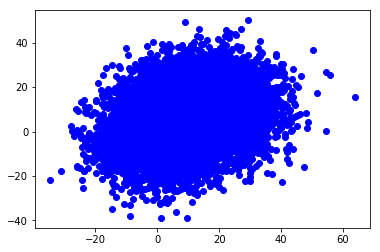

In [49]:
plt.plot(measurements[:, 0], measurements[:, 1], "bo")

In [13]:
def inference(x, theta):
    for i, (W, b) in enumerate(theta):
        x = tf.tensordot(x, W, 1) + b
        if i != 2:
            x = tf.nn.relu(x)
    return x

In [6]:
weights = [
    tf.get_variable(
        "weights_one",
        [N, N*2],
        initializer=tf.truncated_normal_initializer()),
    tf.get_variable(
        "weights_two",
        [N*2, N*2],
        initializer=tf.truncated_normal_initializer()),
    tf.get_variable(
        "weights_three",
        [N*2, M],
        initializer=tf.truncated_normal_initializer())]

In [7]:
biases = [
    tf.get_variable(
        "biases_one",
        [N*2],
        initializer=tf.constant_initializer(1.0)),
    tf.get_variable(
        "biases_two",
        [N*2],
        initializer=tf.constant_initializer(1.0)),
    tf.get_variable(
        "biases_three",
        [M],
        initializer=tf.constant_initializer(1.0))]

In [50]:
def train(x_inputs, y_labels, W, b):
    y_pred = inference(
        x_inputs,
        zip(W, b))
    loss = tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=y_pred,
            labels=y_labels))
    return tf.argmax(y_pred, axis=-1), loss, tf.train.AdamOptimizer(
        learning_rate=0.1).minimize(
        loss, var_list=(W + b))

In [51]:
x_holder = tf.placeholder(tf.float32)
y_holder = tf.placeholder(tf.int32)
data_out = train(x_holder, y_holder, weights, biases)

In [54]:
losses = []
accuracies = []

session = tf.Session()
session.run(tf.global_variables_initializer())
for i in range(10):
    pred, loss, grad = session.run(
        data_out,
        feed_dict={x_holder: measurements, y_holder: labels})
    acc = sum([1.0 if pred[i] == labels[i] else 0.0 for i in range(B)]) / B
    print(
        "Accuracy: %.2f %%" % acc,
        "Loss: %.2f" % loss)
    
    losses += [loss]
    accuracies += [acc]

Accuracy: 0.15 % Loss: 11533.53
Accuracy: 0.58 % Loss: 5829.85
Accuracy: 1.00 % Loss: 1.39
Accuracy: 1.00 % Loss: 9.62
Accuracy: 0.98 % Loss: 232.09
Accuracy: 0.99 % Loss: 83.18
Accuracy: 1.00 % Loss: 7.97
Accuracy: 1.00 % Loss: 0.17
Accuracy: 1.00 % Loss: 0.33
Accuracy: 1.00 % Loss: 1.60


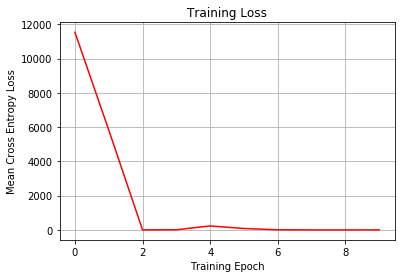

In [56]:
plt.plot(losses, "r-")
plt.xlabel("Training Epoch")
plt.ylabel("Mean Cross Entropy Loss")
plt.title("Training Loss")
plt.grid(True)
plt.show()

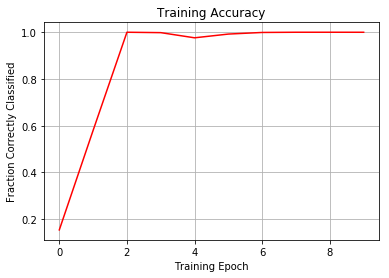

In [58]:
plt.plot(accuracies, "r-")
plt.xlabel("Training Epoch")
plt.ylabel("Fraction Correctly Classified")
plt.title("Training Accuracy")
plt.grid(True)
plt.show()